#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [168]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [169]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [170]:
def Data_Exploration(data):
  """
  data : data frame for do analysis for it
  """
  print("________________ Data Shape _______________\n")
  print("Number of Rows ",data.shape[0])
  print("Number of Columns ",data.shape[0])
  print("________________ Data Types _______________\n")
  print(data.dtypes)
  print("________________ Missing Value _______________\n")
  print(data.isna().sum())

Data_Exploration(df)

________________ Data Shape _______________

Number of Rows  148654
Number of Columns  148654
________________ Data Types _______________

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
________________ Missing Value _______________

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [171]:
def Descriptive_Statistics_Salary(Salaries):

  salaries_summation = sum(Salaries)
  salaries_median = np.median(Salaries)
  salaries_mode = mode(Salaries)
  salaries_minimum = min(Salaries)
  salaries_maximum = max(Salaries)
  salaries_range = salaries_maximum - salaries_minimum
  salaries_std = np.std(Salaries)

  Statistic = pd.DataFrame()
  Statistic['Statistic Method'] = ['Sum', 'Median', 'Mode', 'Minimum', 'Maximum', 'Range', 'Standard Deviation']
  Statistic['Value'] = [salaries_summation, salaries_median, salaries_mode, salaries_minimum, salaries_maximum, salaries_range, salaries_std]
  print("________________ Descriptive Statistics Salary _______________\n")
  print(Statistic)

Descriptive_Statistics_Salary(df['BasePay'])




________________ Descriptive Statistics Salary _______________

     Statistic Method          Value
0                 Sum            NaN
1              Median            NaN
2                Mode       0.000000
3             Minimum    -166.010000
4             Maximum  319275.010000
5               Range  319441.020000
6  Standard Deviation   42764.491064


In [172]:
def Data_Cleaning(df):

    def BasePay_Missing_value(data, column):
        position_mean_salaries = data.groupby('JobTitle')[column].mean()
        for index in range(len(data['JobTitle'])):
          try:
            if pd.isna(data.loc[index, column]):
                job_title = data.loc[index, 'JobTitle']
                mean_salaries = position_mean_salaries.get(job_title)
                print(mean_salaries)
                if not(pd.isna(mean_salaries)):
                    df[column].fillna(mean_salaries, inplace=True)
          except :
            pass

    # Fill missing values in 'BasePay' based on job titles "because most of time is similar"
    BasePay_Missing_value(df, 'BasePay')

    # Drop rows with missing values in 'OvertimePay' and 'OtherPay'
    df.dropna(subset=['OvertimePay', 'OtherPay'], inplace=True)
    df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
    df.drop(['Notes','Status'],axis = 1 , inplace =True) # because all values in this column is missing
Data_Cleaning(df)

222140.58500000002


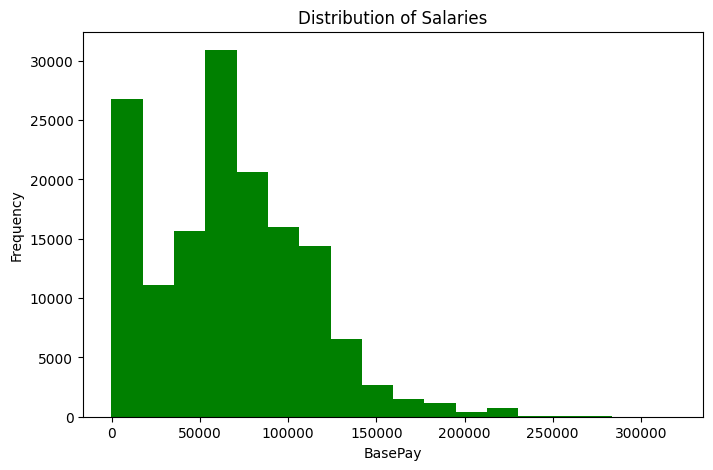

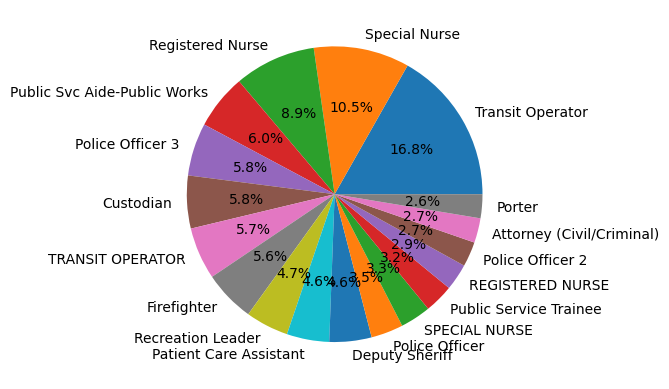

In [173]:
plt.figure(figsize=(8, 5))
plt.hist(df['BasePay'], bins=18, color='green')
plt.title('Distribution of Salaries')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

department_proportions = df['JobTitle'].value_counts(normalize=True)
plt.pie(department_proportions[:18], labels=department_proportions[:18].index, autopct='%1.1f%%') # i select top 18 to be the image clear
plt.show()

## summary for Distribution of Salaries :
Most people's salaries are less than 100,000, and most of them are between 60-70 thousand and between 0-10 thousand.


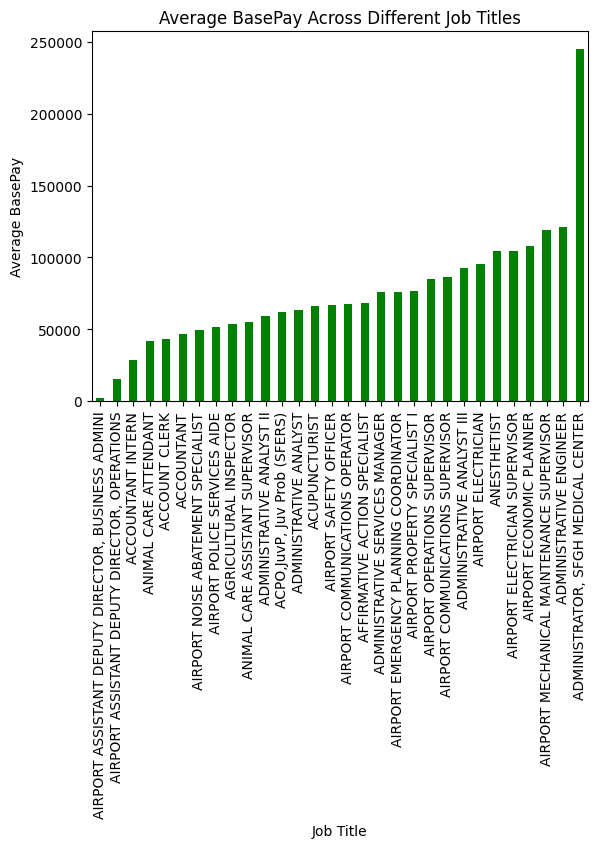

In [174]:
grouped_data = df.groupby('JobTitle')['BasePay'].mean()
grouped_data = grouped_data[:30]
grouped_data.sort_values().plot(kind='bar', color='green')
plt.title('Average BasePay Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average BasePay')
plt.show()

## JobTitle sketch summary :
Through the job title posstion drawing, you occupy the job (Adminstrator , sfgh medical center )  first place in Average BasePay
The job (Airport assistant deputy ..)  is considered the lowest paid

and the top three jobs paid by year is : 
1)Adminstrator ...
2)Adminstrative engineer
3)Airport mechanical 


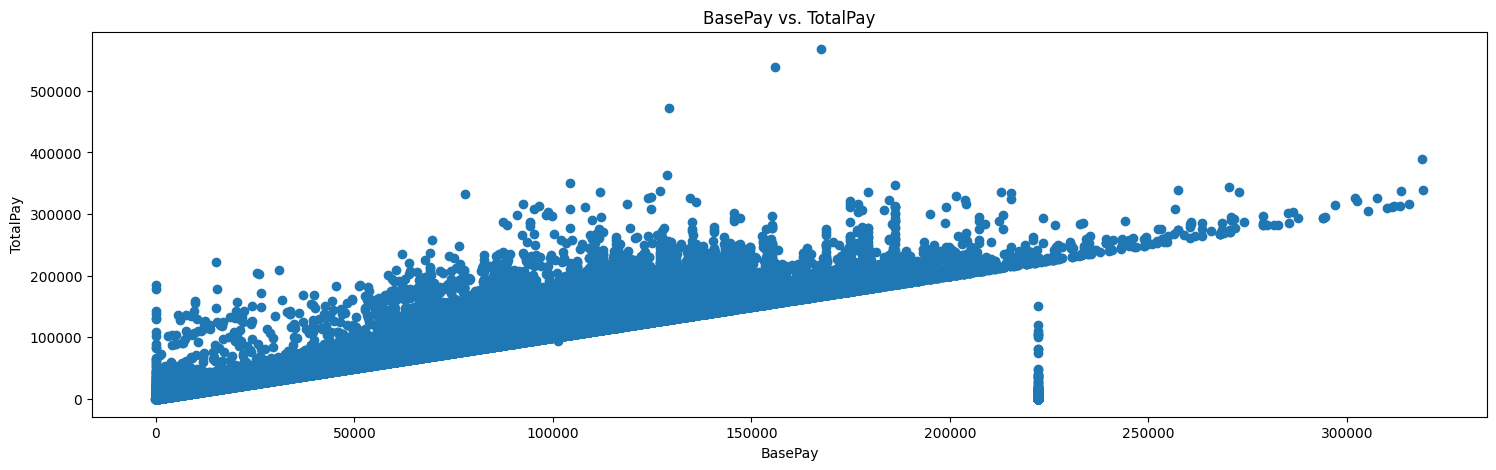

In [175]:
correlation_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(18, 5))
plt.scatter(df['BasePay'], df['TotalPay'])
plt.title('BasePay vs. TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()


## summary :
We notice that the higher the basepay salary the totalPay is increase 

# Good Luck!